In [1]:
import cv2 as cv
import skimage
import numpy as np
import time
import matplotlib.pyplot as plt

In [ ]:
img=cv.imread('image/blueberries1.jpg')
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [ ]:
#소벨 에지 검출(sobel 함수 사용용)
grad_x=cv.Sobel(gray,cv.CV_32F,1,0,ksize=3)
grad_y=cv.Sobel(gray,cv.CV_32F,0,1,ksize=3)

sobel_x=cv.convertScaleAbs(grad_x)
sobel_y=cv.convertScaleAbs(grad_y)

edge_strength=cv.addWeighted(sobel_x,0.5,sobel_y,0.5,0)

cv.imshow('original', gray)
cv.imshow('sobelx', sobel_x)
cv.imshow('soibely', sobel_y)
cv.imshow('edge strength', edge_strength)

cv.waitKey()
cv.destroyAllWindows()


In [ ]:
canny1=cv.Canny(gray,50,150)
canny2=cv.Canny(gray,100,200)

cv.imshow('original', gray)
cv.imshow('canny1', canny1)
cv.imshow('canny2', canny2)

cv.waitKey()
cv.destroyAllWindows()

In [ ]:
contour,hierarchy=cv.findContours(canny2,cv.RETR_LIST,cv.CHAIN_APPROX_NONE)

lcontour=[]
for i in range(len(contour)):
    if contour[i].shape[0]>100:
        lcontour.append(contour[i])


cv.drawContours(img,lcontour,-1,(0,255,0),3)

cv.imshow('original', img)
cv.imshow('canny', canny2)

cv.waitKey()
cv.destroyAllWindows()

In [ ]:
img=cv.imread('image/apples1.jpg')
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [ ]:
apples=cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, 200, param1=150, param2=20, minRadius=100, maxRadius=120)

for i in apples[0]:
    cv.circle(img,(int(i[0]),int(i[1])),int(i[2]),(255,0,0),2)

cv.imshow('APPLE',img)

cv.waitKey()
cv.destroyAllWindows()

In [ ]:
coffee=skimage.data.coffee()
cv.imshow('Coffee',cv.cvtColor(coffee,cv.COLOR_RGB2BGR))

slic1=skimage.segmentation.slic(coffee,compactness=20,n_segments=600)
sp_img1=skimage.segmentation.mark_boundaries(coffee,slic1)
sp_img1=np.uint8(sp_img1*255.0)

slic2=skimage.segmentation.slic(coffee,compactness=40,n_segments=600)
sp_img2=skimage.segmentation.mark_boundaries(coffee,slic2)
sp_img2=np.uint8(sp_img2*255.0)

cv.imshow('compact20',cv.cvtColor(sp_img1,cv.COLOR_RGB2BGR))
cv.imshow('compact40',cv.cvtColor(sp_img2,cv.COLOR_RGB2BGR))

cv.waitKey()
cv.destroyAllWindows()

In [ ]:
#버전 업데이트로 인한 사용 불가
coffee=skimage.data.coffee()

start=time.time()
slic=skimage.segmentation.slic(coffee,compactness=20,n_segments=600,start_label=1)

g=skimage.future.graph.rag_mean_color(coffee,slic,mode='similarity')
ncut=skimage.future.graph.cut_normalized(slic,g)
print(coffee.shape,'영상 분할까지',time.time()-start,'초')

marking=skimage.segmentation.mark_boundaries(coffee,ncut)
ncut=skimage.future.graph.cut_normalized(slic,g)

marking=skimage.segmentation.mark_boundaries(coffee,ncut)
ncut_coffee=np.uint8(marking*255.0)

cv.imshow('nomalized',cv.cvtColor(ncut_coffee,cv.COLOR_RGB2BGR))

cv.waitKey()
cv.destroyAllWindows()

이미지 크기: (400, 600, 3), 분할 시간: 0.4078초


C:\Users\user\AppData\Local\Temp\ipykernel_19128\1829432363.py:28: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_19128\1829432363.py:28: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_19128\1829432363.py:28: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_19128\1829432363.py:28: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_19128\1829432363.py:28: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_19128\1829432363.py:28: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s)

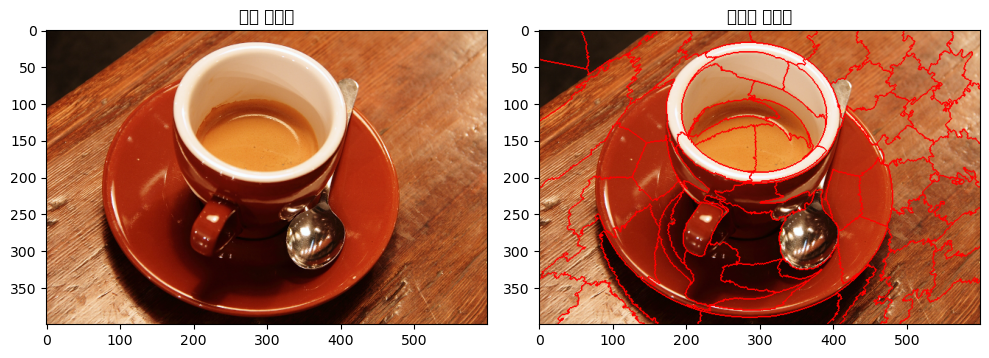

c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47676 (\N{HANGUL SYLLABLE MEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **

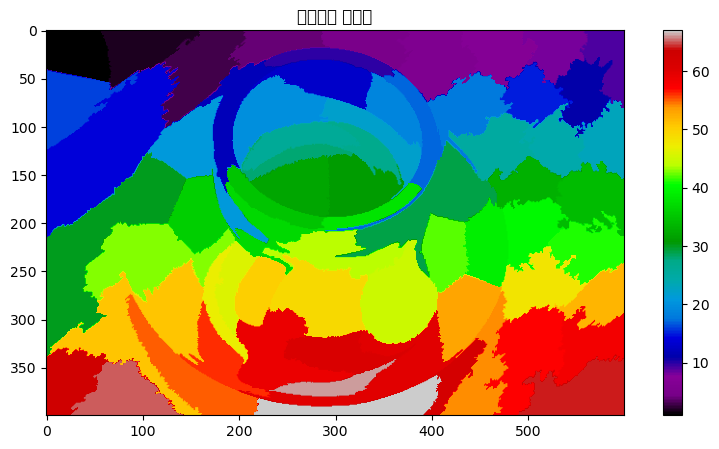

In [2]:
# 커피 이미지 로드
coffee = skimage.data.coffee()

# 시작 시간 측정
start = time.time()

# SLIC 분할 수행
# 매개변수 조정 가능: n_segments(분할할 영역 수), compactness(영역의 모양 규칙성)
slic = skimage.segmentation.slic(coffee, 
                                 n_segments=100,  # 세그먼트 수 조정 
                                 compactness=10,  # 컴팩트니스 조정
                                 start_label=1)

# 분할 경계 표시
marked_image = skimage.segmentation.mark_boundaries(coffee, slic, color=(1, 0, 0))

# 처리 시간 출력
print(f'이미지 크기: {coffee.shape}, 분할 시간: {time.time()-start:.4f}초')

# matplotlib를 사용해 이미지 표시 (OpenCV 대신)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('원본 이미지')
plt.imshow(coffee)
plt.subplot(122)
plt.title('분할된 이미지')
plt.imshow(marked_image)
plt.tight_layout()
plt.show()

# 선택적: 세그먼트 레이블 시각화
plt.figure(figsize=(10, 5))
plt.imshow(slic, cmap='nipy_spectral')
plt.title('세그먼트 레이블')
plt.colorbar()
plt.show()

In [ ]:
img=cv.imread('image/blueberries1.jpg')
img_show=np.copy(img)

mask=np.zeros((img.shape[0],img.shape[1]),np.uint8)
mask[:,:]=cv.GC_PR_BGD

#브러시 사이즈 및 색 설정
BrushSiz=9
LColor,RColor=(255,0,0),(0,0,255)

#그림을 그리는 함수
def paint(event,x,y,flags,param):
    if event==cv.EVENT_LBUTTONDOWN:
        cv.circle(img_show,(x,y),BrushSiz,LColor,-1)
        cv.circle(mask,(x,y),BrushSiz,cv.GC_FGD,-1)
    elif event==cv.EVENT_RBUTTONDOWN:
        cv.circle(img_show,(x,y),BrushSiz,RColor,-1)
        cv.circle(mask,(x,y),BrushSiz,cv.GC_BGD,-1)
    elif event==cv.EVENT_MOUSEMOVE and flags==cv.EVENT_FLAG_LBUTTON:
        cv.circle(img_show,(x,y),BrushSiz,LColor,-1)
        cv.circle(mask,(x,y),BrushSiz,cv.GC_FGD,-1)
    elif event==cv.EVENT_MOUSEMOVE and flags==cv.EVENT_FLAG_RBUTTON:
        cv.circle(img_show,(x,y),BrushSiz,RColor,-1)
        cv.circle(mask,(x,y),BrushSiz,cv.GC_BGD,-1)
    
    cv.imshow('Paint',img_show)
cv.namedWindow('Paint')
cv.setMouseCallback('Paint',paint)

while(True):
    if cv.waitKey(1)==ord('q'):
        break

background=np.zeros((1,65),np.float64)
foreground=np.zeros((1,65),np.float64)

cv.grabCut(img,mask,None,background,foreground,5,cv.GC_INIT_WITH_MASK)
mask2=np.where((mask==cv.GC_BGD)|(mask==cv.GC_PR_BGD),0,1).astype('uint8')
grab=img*mask2[:,:,np.newaxis]
cv.imshow('Grab cut image',grab)

cv.waitKey()
cv.destroyAllWindows()

In [2]:
orig=skimage.data.horse()
img=255-np.uint8(orig)*255
cv.imshow('horse',img)

contours,hierarchy=cv.findContours(img,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE)

img2=cv.cvtColor(img,cv.COLOR_GRAY2BGR)
cv.drawContours(img2,contours,-1,(255,0,255),2)
cv.imshow('horse with contour',img2)

contour=contours[0]

m=cv.moments(contour)
area=cv.contourArea(contour)
cx,cy=m['m10']/m['m00'],m['m01']/m['m00']
perimeter=cv.arcLength(contour,True)
roundness=(4.9*np.pi*area)/(perimeter*perimeter)
print(',면적=',area,'/n중점=(',cx,',',cy,')','/n둘레=',perimeter,'/n둥근 정도=',roundness)

img3=cv.cvtColor(img,cv.COLOR_GRAY2BGR)

contour_approx=cv.approxPolyDP(contour,8,True)
cv.drawContours(img3,[contour_approx],-1,(0,255,0),2)

hull=cv.convexHull(contour)
hull=hull.reshape(1,hull.shape[0],hull.shape[2])
cv.drawContours(img3,hull,-1,(0,0,255),2)

cv.imshow('horse with line segments and convex hull',img3)

cv.waitKey()
cv.destroyAllWindows()

,면적= 42390.0 /n중점=( 187.72464024534088 , 144.43640402610677 ) /n둘레= 2296.7291333675385 /n둥근 정도= 0.1237057283393758
